In [4]:
import sys

sys.path.append("../../../")

import src.models

models = {
    "CNN_baseline": "20240513-014155",
    "Full_Liquid_baseline": "20240513-012009",
    "Full_Liquid_conf0": "20240513-023744",
    "Full_Liquid_conf1": "20240513-023907",
    "Full_Liquid_conf2": "20240513-020657",
    "Full_Liquid_conf3": "20240513-023624",
    "Full_Liquid_conf4": "20240513-132128",
    "Full_Liquid_conf5": "20240517-022147",
    "Full_Liquid_conf3_fast": "20240517-023457",
    "Full_Liquid_conf5_fast": "20240517-024933",
}

model_classes = {
    "CNN_baseline": src.models.MNIST3dCNNBaseline(),
    "Full_Liquid_baseline": src.models.MNIST3dFullLiquidBaseline(),
    "Full_Liquid_conf0": src.models.MNIST3dFullLiquidConf0(),
    "Full_Liquid_conf1": src.models.MNIST3dFullLiquidConf1(),
    "Full_Liquid_conf2": src.models.MNIST3dFullLiquidConf2(),
    "Full_Liquid_conf3": src.models.MNIST3dFullLiquidConf3(),
    "Full_Liquid_conf4": src.models.MNIST3dFullLiquidConf4(),
    "Full_Liquid_conf5": src.models.MNIST3dFullLiquidConf5(),
    "Full_Liquid_conf3_fast": src.models.MNIST3dFullLiquidConf3(),
    "Full_Liquid_conf5_fast": src.models.MNIST3dFullLiquidConf5(),
}

alloc!
alloc!
alloc!
alloc!
alloc!
alloc!
alloc!
alloc!
alloc!
alloc!
alloc!
alloc!
alloc!
alloc!
alloc!


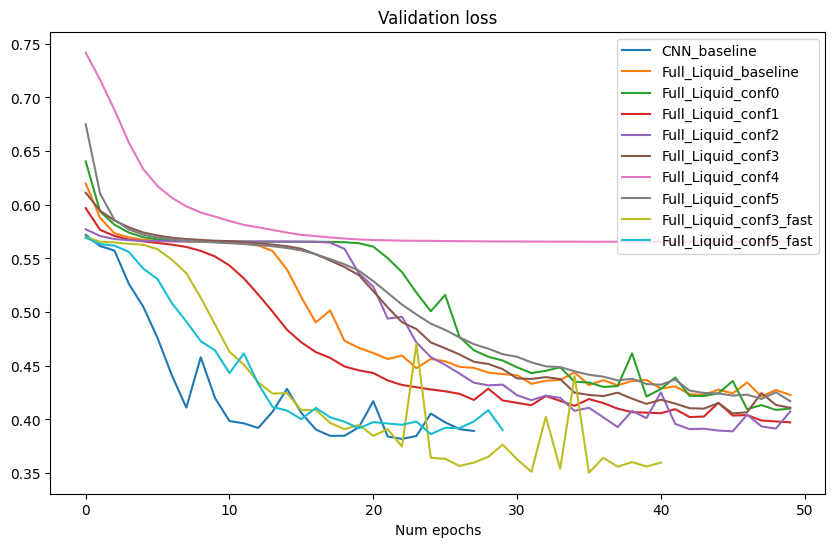

In [5]:
import numpy as np
import os
import json
import pathlib
import matplotlib.pyplot as plt
import re

plt.figure(figsize=(10, 6))

labels = []
for model_name, address in models.items():
    cur_loss = []
    labels.append(model_name)

    cur_dir = pathlib.Path("./saved_models/") / address
    files = os.listdir(cur_dir)
    files.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
    for file_name in files:
        if ".json" not in file_name:
            continue

        with open(cur_dir / file_name) as f:
            cur_metrics = json.load(f)
        
        cur_loss.append(cur_metrics["val_loss"])

    x = np.arange(len(cur_loss))
    y = np.array(cur_loss)
    plt.plot(x, y)

plt.legend(labels)
plt.title("Validation loss")
plt.xlabel("Num epochs")
# plt.ylabel("")
plt.show()

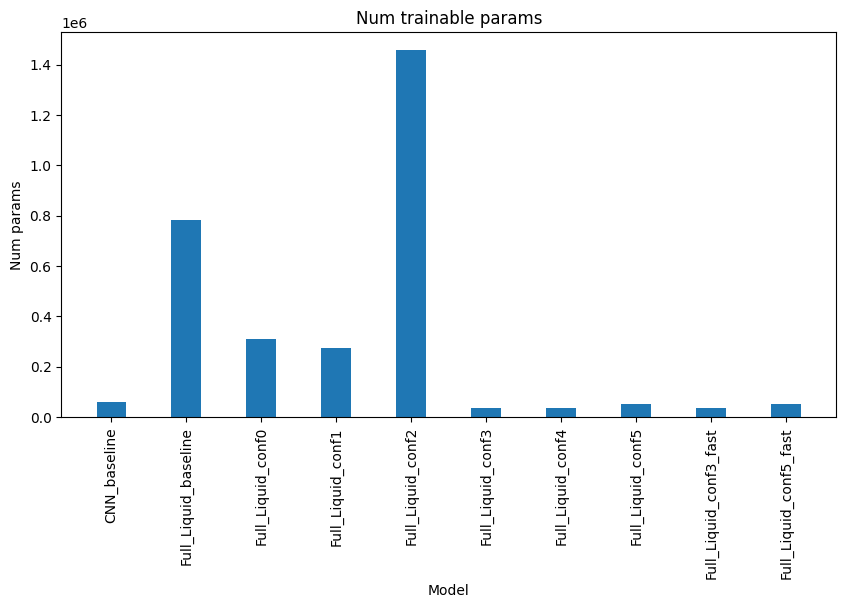

In [6]:
model_params = {}

for model_name, model_class in model_classes.items():
    model_parameters = filter(lambda p: p.requires_grad, model_class.parameters())
    model_params[model_name] = sum([np.prod(p.size()) for p in model_parameters])

model_names = list(model_params.keys())
num_params = list(model_params.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(model_names, num_params, 
        width = 0.4)
 
plt.xlabel("Model")
plt.xticks(rotation='vertical')
plt.ylabel("Num params")
plt.title("Num trainable params")
plt.show()

In [1]:
import sys

sys.path.append("../../../")

import src.models


model_classes = {
    "CNNBaseline": src.models.CNNBaseline(),
    "CNNBaselineLarge": src.models.CNNBaselineLarge(),
    "CNNBaselineSmall": src.models.CNNBaselineSmall(),
    "CNNBaselineVerySmall": src.models.CNNBaselineVerySmall(),
}

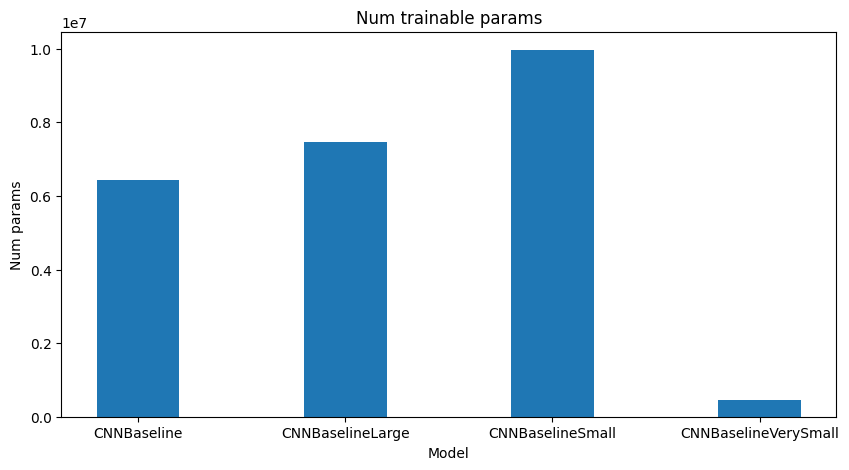

In [3]:
import numpy as np
import matplotlib.pyplot as plt


model_params = {}

for model_name, model_class in model_classes.items():
    model_parameters = filter(lambda p: p.requires_grad, model_class.parameters())
    model_params[model_name] = sum([np.prod(p.size()) for p in model_parameters])

model_names = list(model_params.keys())
num_params = list(model_params.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(model_names, num_params, 
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("Num params")
plt.title("Num trainable params")
plt.show()